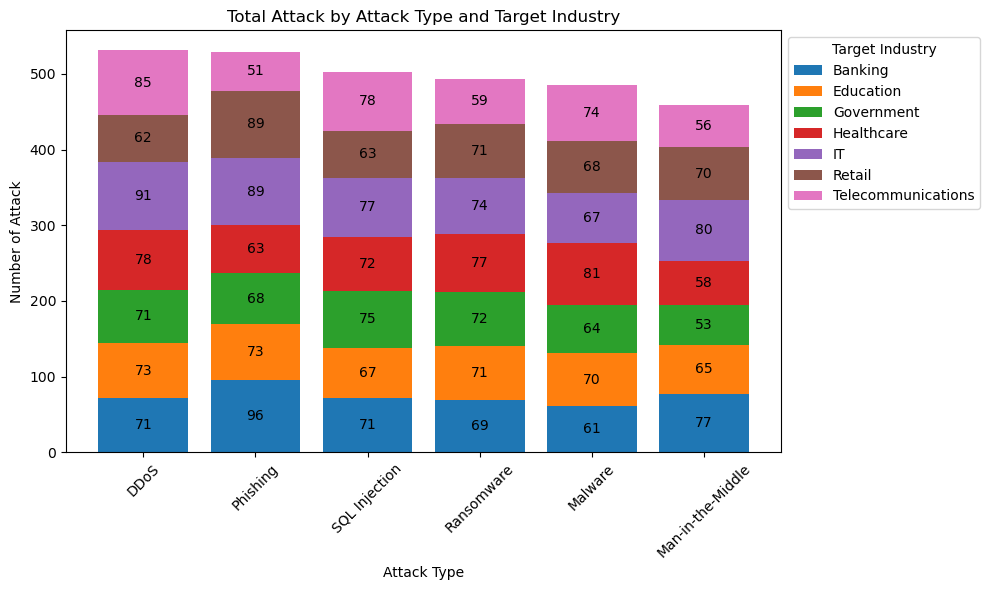

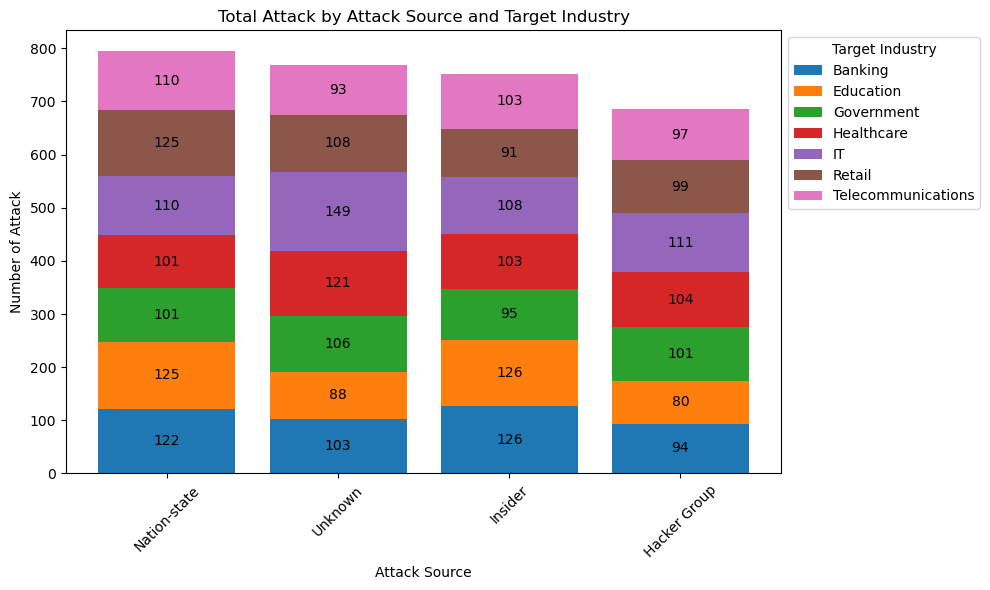

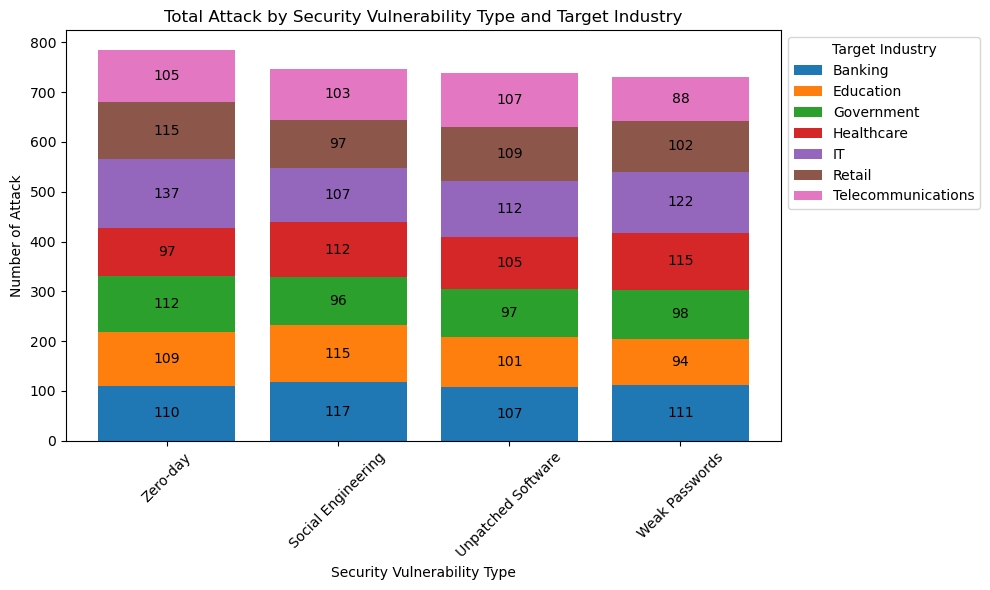

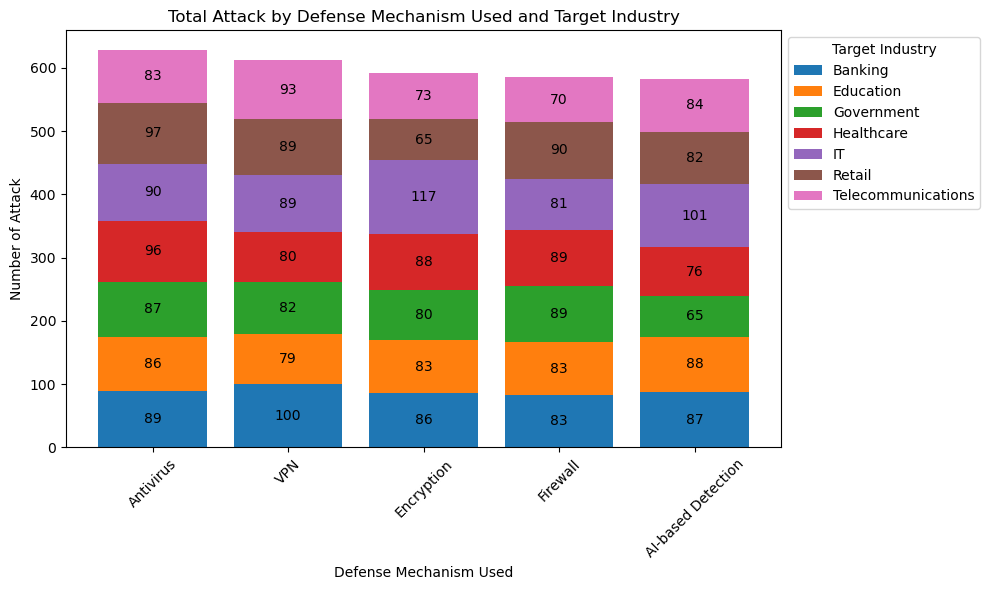

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Most Context and Grouping for Nonconditional Data
target_col = [
    { 'count_col' : 'Attack Type', 'group_col' : 'Target Industry' },
    { 'count_col' : 'Attack Source', 'group_col' : 'Target Industry' },
    { 'count_col' : 'Security Vulnerability Type', 'group_col' : 'Target Industry' },
    { 'count_col' : 'Defense Mechanism Used', 'group_col' : 'Target Industry' },
]

for dt in target_col:
    count_col = dt['count_col']
    group_col = dt['group_col']
    
    # Dataset
    context_group_counts = df.groupby([count_col, group_col]).size().reset_index(name='Count')
    stacked_data = context_group_counts.pivot(index=count_col, columns=group_col, values='Count').fillna(0)
    
    # Ordering
    stacked_data['Total'] = stacked_data.sum(axis=1)
    stacked_data = stacked_data.sort_values(by='Total', ascending=False).head(7)
    categories = stacked_data.columns[:-1] 
    counts = stacked_data[categories].values 
    
    # Plotting
    context = stacked_data.index
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = np.zeros(len(context))
    
    # Plot each group_col as stack
    for group_col_index, group in enumerate(categories):
        p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
        bottom += counts[:, group_col_index]
        ax.bar_label(p, label_type='center', fmt='%d')
    
    # Customizing the plot
    ax.set_title(f'Total Attack by {count_col} and {group_col}')
    ax.set_xlabel(count_col)
    ax.set_ylabel('Number of Attack')
    ax.legend(title=group_col, bbox_to_anchor=(1, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")